# Portfolio Assignment 1 (M4): SGD Mechanics & Attention Context


## Part A: Manual Stochastic Gradient Descent
The objective of this section is to manually demonstrate how stochastic gradient descent updates a model parameter over individual samples.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
url = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv"
data = pd.read_csv(url)

# Taking first 3 samples
subset = data.head(3)
print(subset)

     X      Y
0  108  392.5
1   19   46.2
2   13   15.7


In [4]:
# Hyperparameters
w = 0.5           # initial weight
alpha = 0.001     # learning rate

# Manual SGD on first 3 samples
for i, row in subset.iterrows():
    x = float(row["X"])
    t = float(row["Y"])

    # Forward pass
    y_hat = x * w

    # Loss calculation
    loss = (t - y_hat) ** 2

    # Gradient
    grad = 2 * x * (y_hat - t)

    # Weight update
    w_new = w - alpha * grad

    # Print results
    print(f"Sample {i+1}")
    print(f"x = {x}, t = {t}")
    print(f"Predicted ŷ = {y_hat:.4f}")
    print(f"Loss = {loss:.4f}")
    print(f"Gradient = {grad:.4f}")
    print(f"Updated weight = {w_new:.6f}")
    print("-" * 60)

    w = w_new  # update weight for the next sample


Initial weight: 0.5
------------------------------------------------------------
Sample 1
x = 108.0, t = 392.5
Predicted ŷ = 54.0000
Loss = 114582.2500
Gradient = -73116.0000
Updated weight = 73.616000
------------------------------------------------------------
Sample 2
x = 19.0, t = 46.2
Predicted ŷ = 1398.7040
Loss = 1829267.0700
Gradient = 51395.1520
Updated weight = 22.220848
------------------------------------------------------------
Sample 3
x = 13.0, t = 15.7
Predicted ŷ = 288.8710
Loss = 74622.4084
Gradient = 7102.4466
Updated weight = 15.118401
------------------------------------------------------------


# Interpretation

* The code demonstrates stochastic gradient descent (SGD) for a simple linear
regression model where the weight is updated after each data sample.

* Prediction error is measured using squared loss, and its gradient determines the direction and size of the weight update.

* Large errors lead to large gradients, causing significant changes in the weight value.

* The example shows how SGD incrementally learns from each sample, even though updates are unstable due to unscaled data and no bias term.




## Part B: Contextualization Using Self-Attention

This section explains how self-attention enables a word’s representation to vary based on the context in which it appears. Unlike static word embeddings that remain the same in all situations, self-attention dynamically adjusts word representations by assigning different importance to surrounding tokens.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Initialize 2D Embeddings
embeddings = {
    "hit": np.array([0.9, 0.2]),
    "ball": np.array([0.8, 0.3]),
    "bat": np.array([0.5, 0.5]),
    "flew": np.array([0.2, 0.9]),
    "cave": np.array([0.3, 0.8])
}



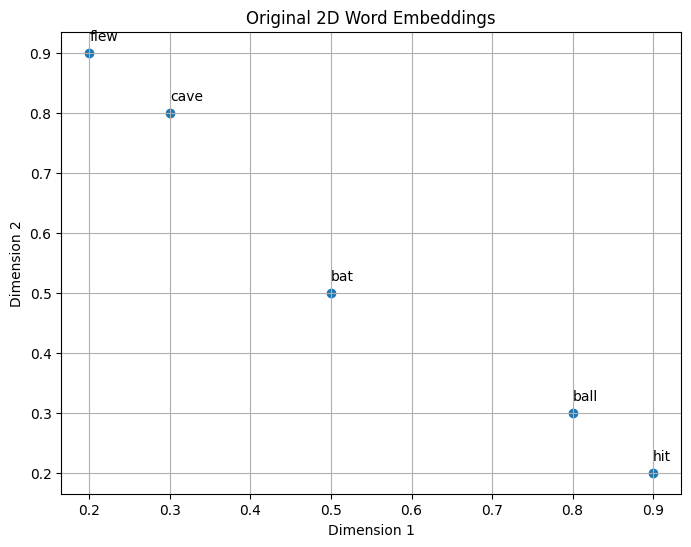

In [8]:
# Plot Original Word Embeddings (2D)
x = [embeddings[word][0] for word in embeddings]
y = [embeddings[word][1] for word in embeddings]
words = list(embeddings.keys())

plt.figure(figsize=(8, 6))
plt.scatter(x, y)

for i, word in enumerate(words):
    plt.text(x[i], y[i] + 0.02, word)

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Original 2D Word Embeddings")
plt.grid(True)
plt.show()


In [9]:
# Sentence 1: Sports Context “hit ball bat”
sentence_1 = ["hit", "ball", "bat"]

Q1 = np.array([embeddings[word] for word in sentence_1])
K1 = Q1
V1 = Q1


In [10]:
# Sentence 2: Animal Context “bat flew cave”
sentence_2 = ["bat", "flew", "cave"]

Q2 = np.array([embeddings[word] for word in sentence_2])
K2 = Q2
V2 = Q2


In [14]:
# Softmax Function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)

#Self-Attention: Sentence 1
scores_1 = Q1.dot(K1.T)
attention_weights_1 = softmax(scores_1)
output_1 = attention_weights_1.dot(V1)

#Self-Attention: Sentence 2
scores_2 = Q2.dot(K2.T)
attention_weights_2 = softmax(scores_2)
output_2 = attention_weights_2.dot(V2)




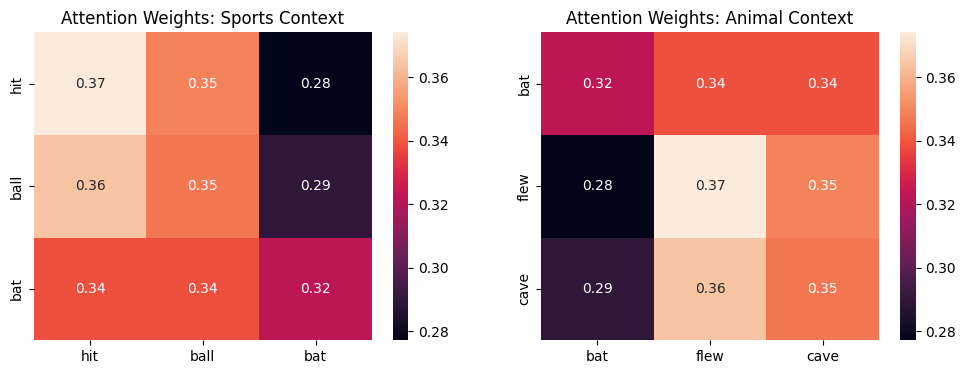

In [15]:
#Create a heatmap for the attention weights
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(attention_weights_1, annot=True, fmt=".2f",
            xticklabels=sentence_1, yticklabels=sentence_1)
plt.title("Attention Weights: Sports Context")

plt.subplot(1, 2, 2)
sns.heatmap(attention_weights_2, annot=True, fmt=".2f",
            xticklabels=sentence_2, yticklabels=sentence_2)
plt.title("Attention Weights: Animal Context")

plt.show()


In [17]:
bat_vector_sports = output_1[2]   # "bat" in sports context
bat_vector_animal = output_2[0]   # "bat" in animal context

cosine_similarity = np.dot(bat_vector_sports, bat_vector_animal) / (
    np.linalg.norm(bat_vector_sports) * np.linalg.norm(bat_vector_animal)
)

print("Cosine Similarity between 'bat' in two contexts:", cosine_similarity)



Cosine Similarity between 'bat' in two contexts: 0.7467073469102196


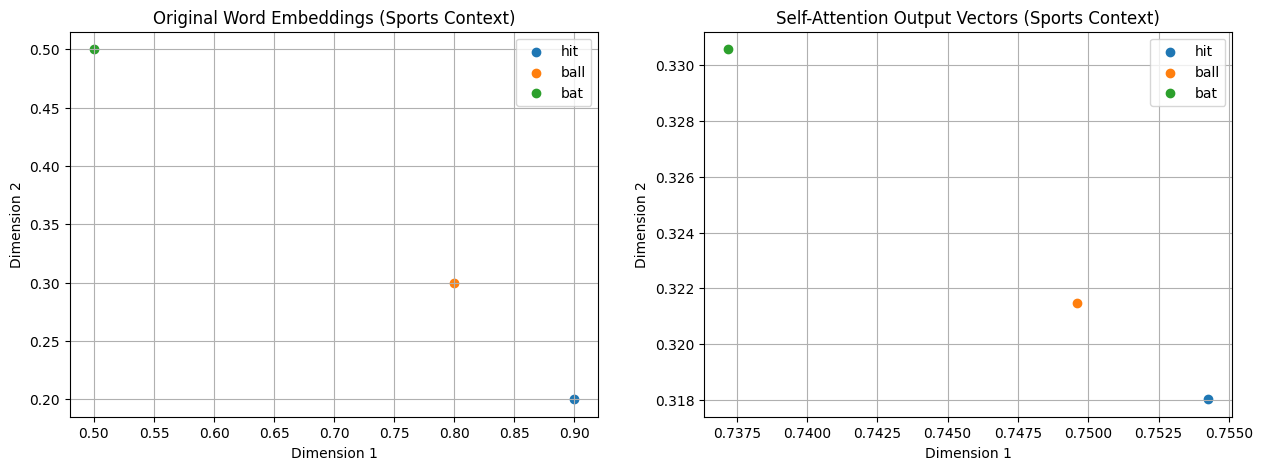

In [18]:
# Sentence 1: Sports context
sentence_1 = ["hit", "ball", "bat"]

# Original embeddings
sentence_embeddings_1 = np.array([embeddings[word] for word in sentence_1])

# Self-attention output already computed earlier as output_1

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_1):
    axes[0].scatter(sentence_embeddings_1[i, 0],
                    sentence_embeddings_1[i, 1],
                    label=word)

axes[0].set_title('Original Word Embeddings (Sports Context)')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot self-attention output vectors
for i, word in enumerate(sentence_1):
    axes[1].scatter(output_1[i, 0],
                    output_1[i, 1],
                    label=word)

axes[1].set_title('Self-Attention Output Vectors (Sports Context)')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()


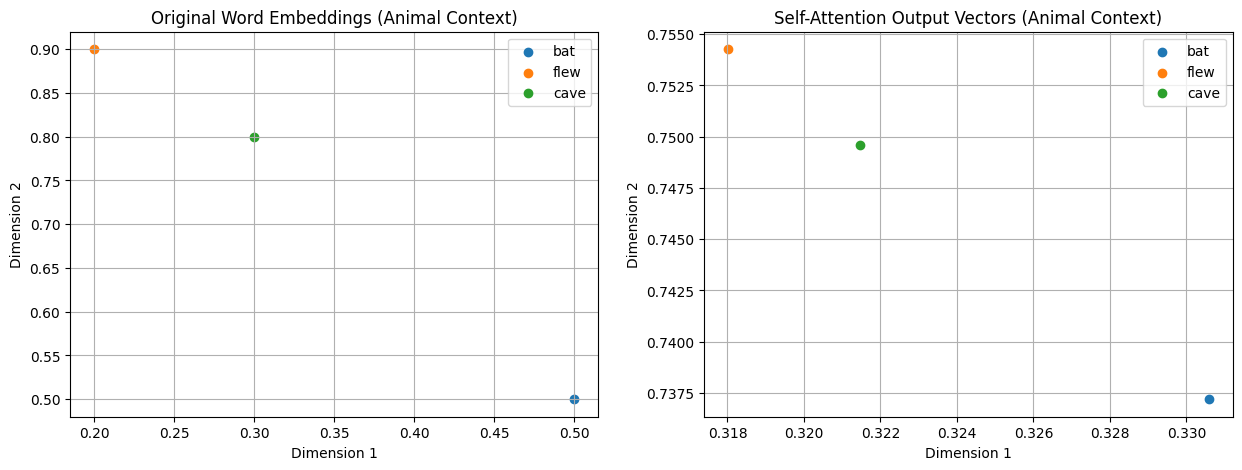

In [19]:
# Sentence 2: Animal context
sentence_2 = ["bat", "flew", "cave"]

# Original embeddings
sentence_embeddings_2 = np.array([embeddings[word] for word in sentence_2])

# Self-attention output already computed earlier as output_2

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_2):
    axes[0].scatter(sentence_embeddings_2[i, 0],
                    sentence_embeddings_2[i, 1],
                    label=word)

axes[0].set_title('Original Word Embeddings (Animal Context)')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot self-attention output vectors
for i, word in enumerate(sentence_2):
    axes[1].scatter(output_2[i, 0],
                    output_2[i, 1],
                    label=word)

axes[1].set_title('Self-Attention Output Vectors (Animal Context)')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()
